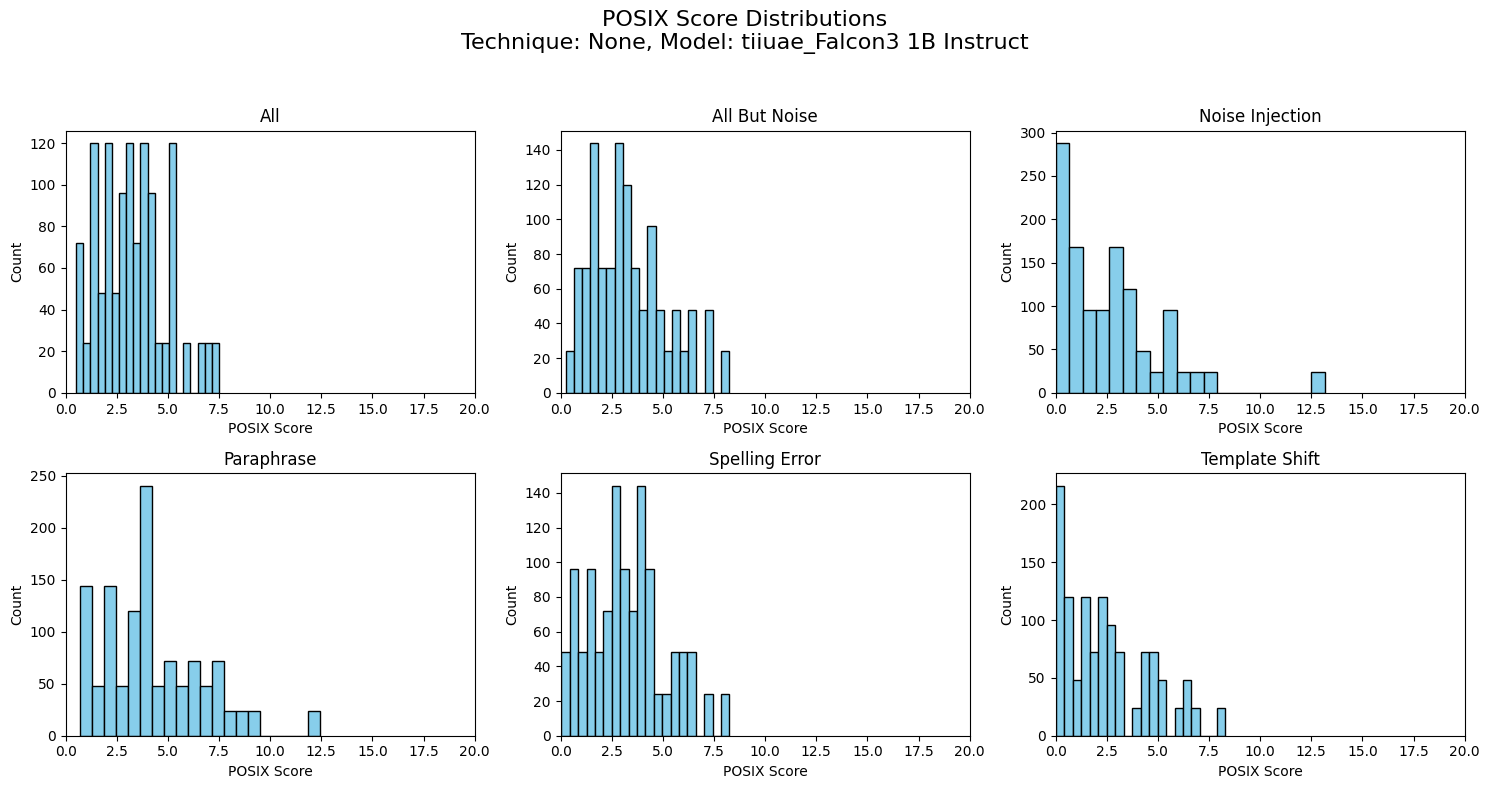

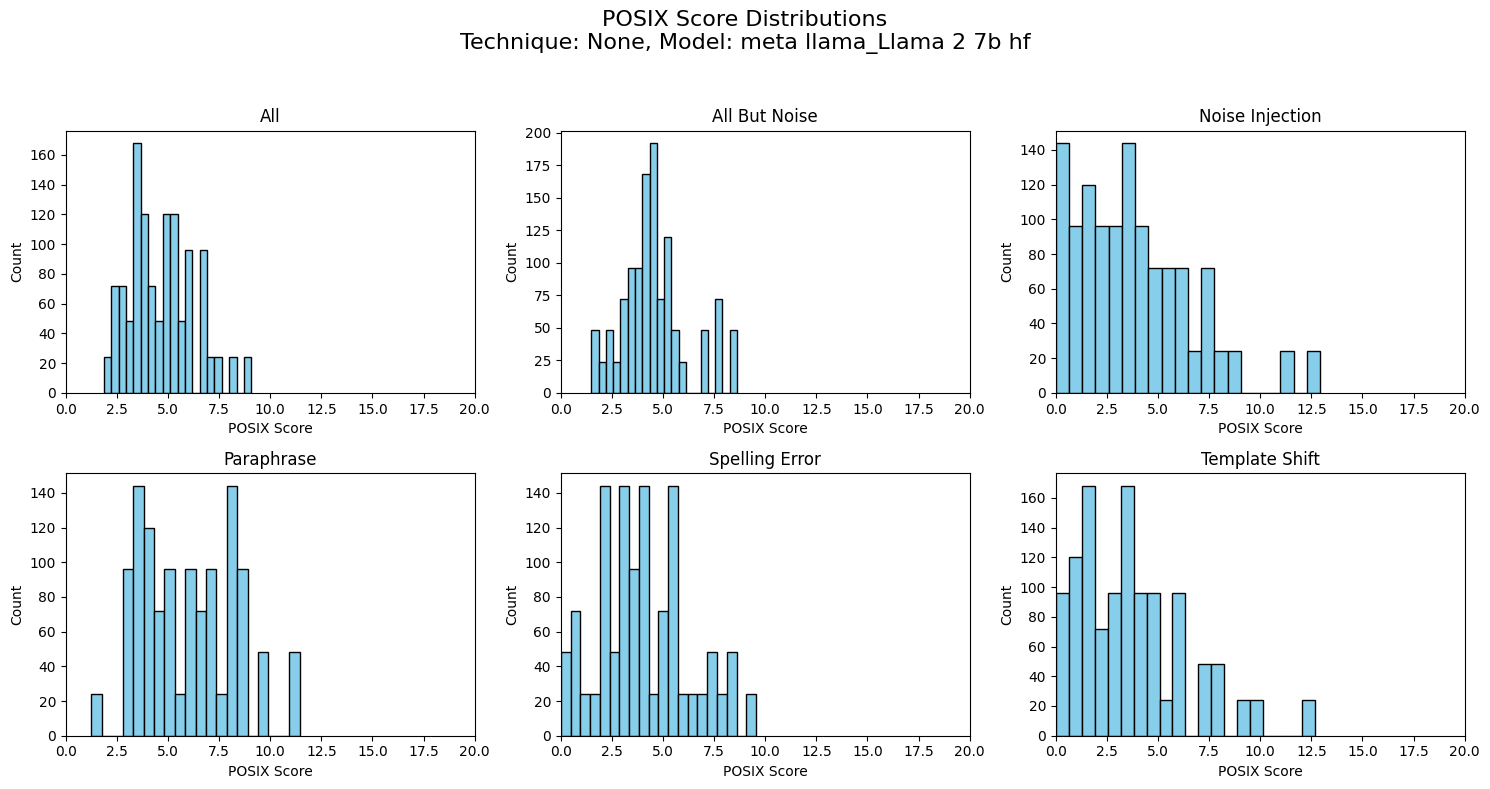

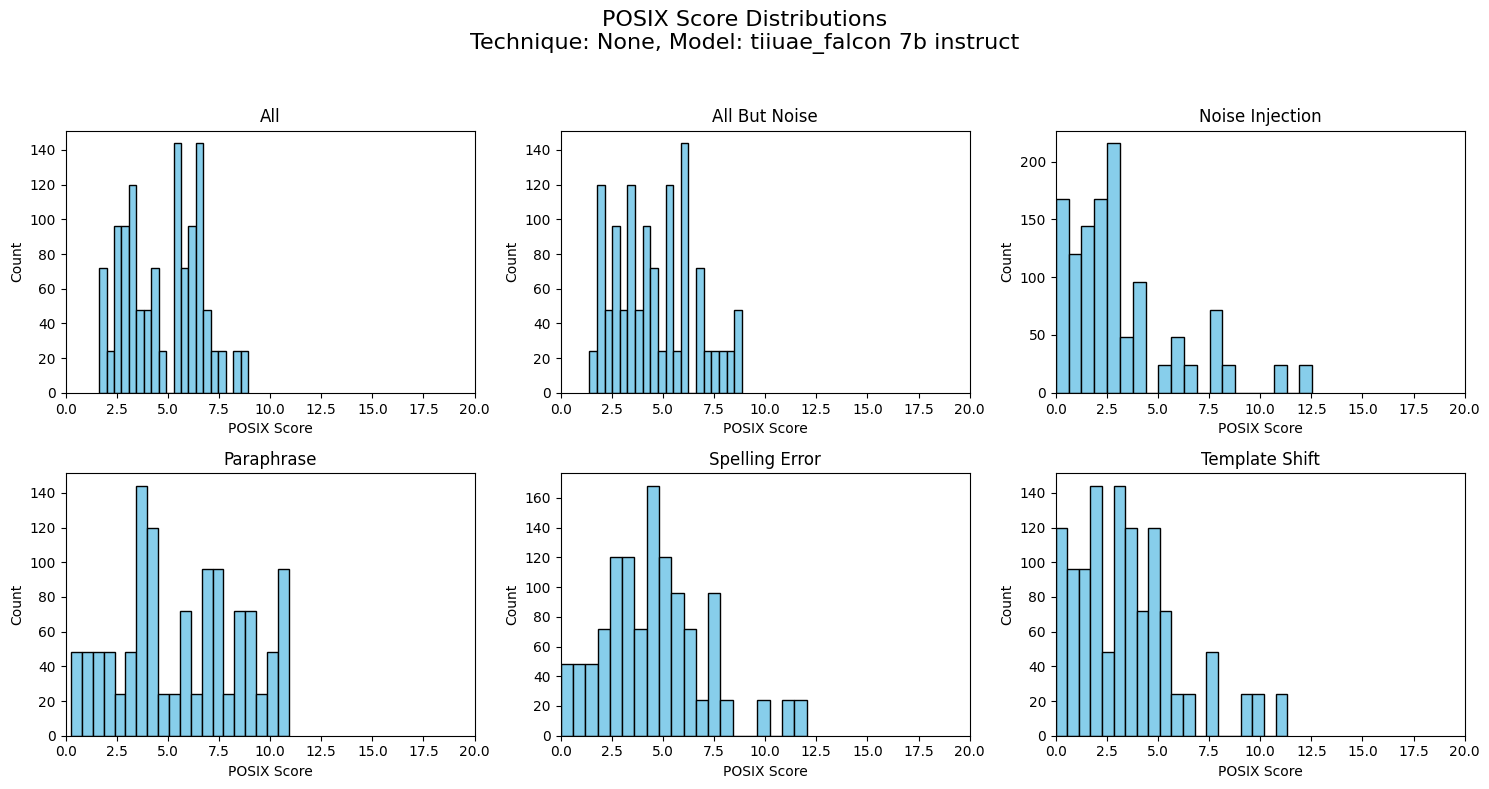

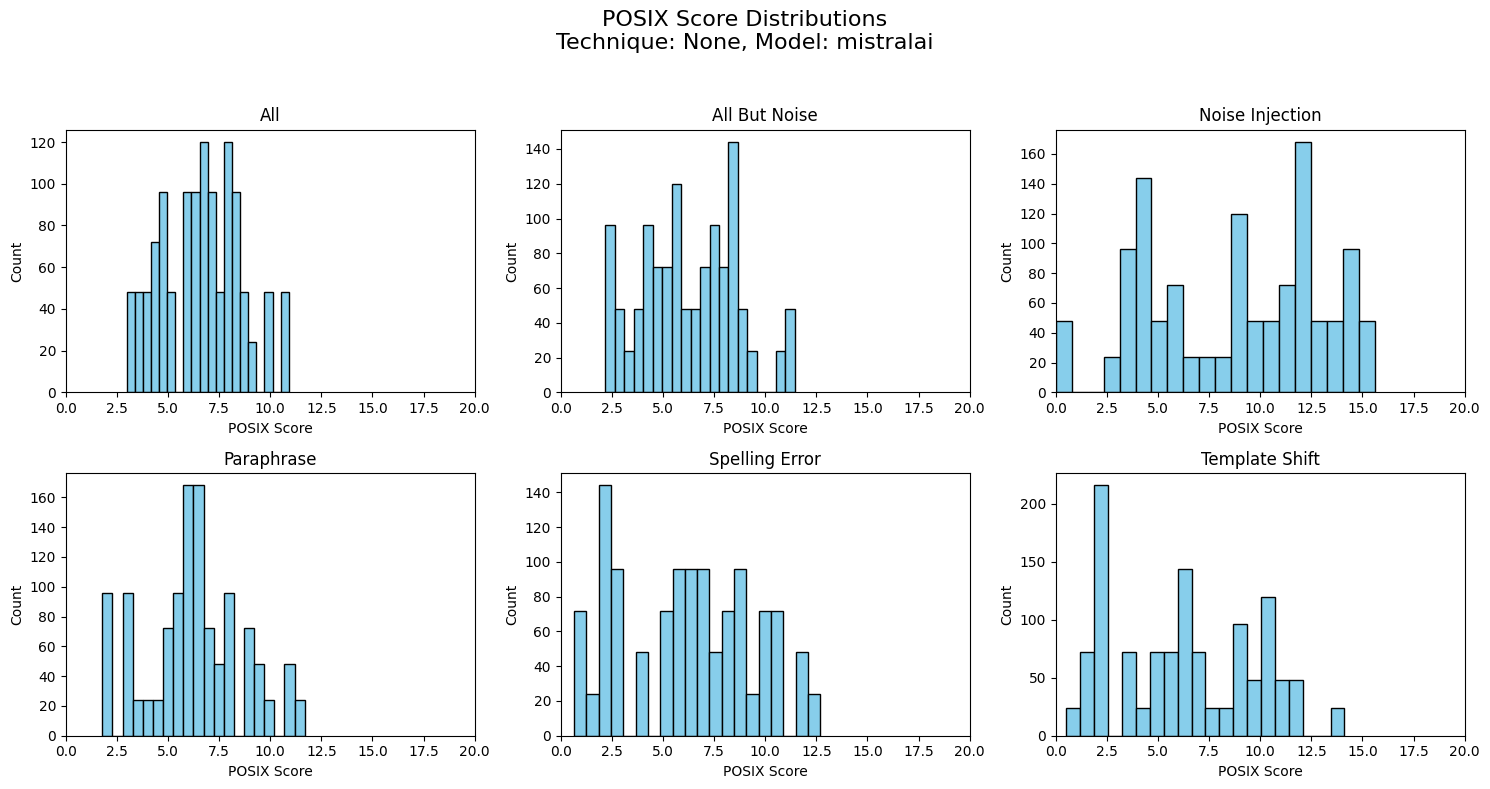

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import glob

# Folder where your CSVs are located
folder_path = "."  # <-- Replace with your actual path
csv_files = glob.glob(os.path.join(folder_path, "posix_*_ft_*_merged.csv"))

# Go through each CSV file
for file_path in csv_files:
    df = pd.read_csv(file_path)

    # Extract technique and model type from filename
    filename = os.path.basename(file_path)
    match = re.match(r"posix_(\w+)_ft_([\w\-]+)_", filename)
    technique = match.group(1) if match else "unknown"
    model_type = match.group(2).replace('-', ' ') if match else "unknown"

    # Extract POSIX-related columns
    posix_columns = [col for col in df.columns if col.startswith("posix_")]

    # Set up subplots
    num_cols = len(posix_columns)
    ncols = 3
    nrows = (num_cols + ncols - 1) // ncols
    plt.figure(figsize=(5 * ncols, 4 * nrows))

    # Plot histogram for each POSIX column
    for idx, col in enumerate(posix_columns, 1):
        plt.subplot(nrows, ncols, idx)
        plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        plt.title(f"{col.replace('posix_', '').replace('_', ' ').title()}")
        plt.xlim(0,20)
        plt.xlabel("POSIX Score")
        plt.ylabel("Count")

    # Final touches
    plt.suptitle(f"POSIX Score Distributions\nTechnique: {technique}, Model: {model_type}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


/var/folders/xm/7ykmt1mj54367qwg67sfh6n80000gn/T/ipykernel_5834/1409326451.py:65: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.001, 0.7])  # leave room on the right for legend


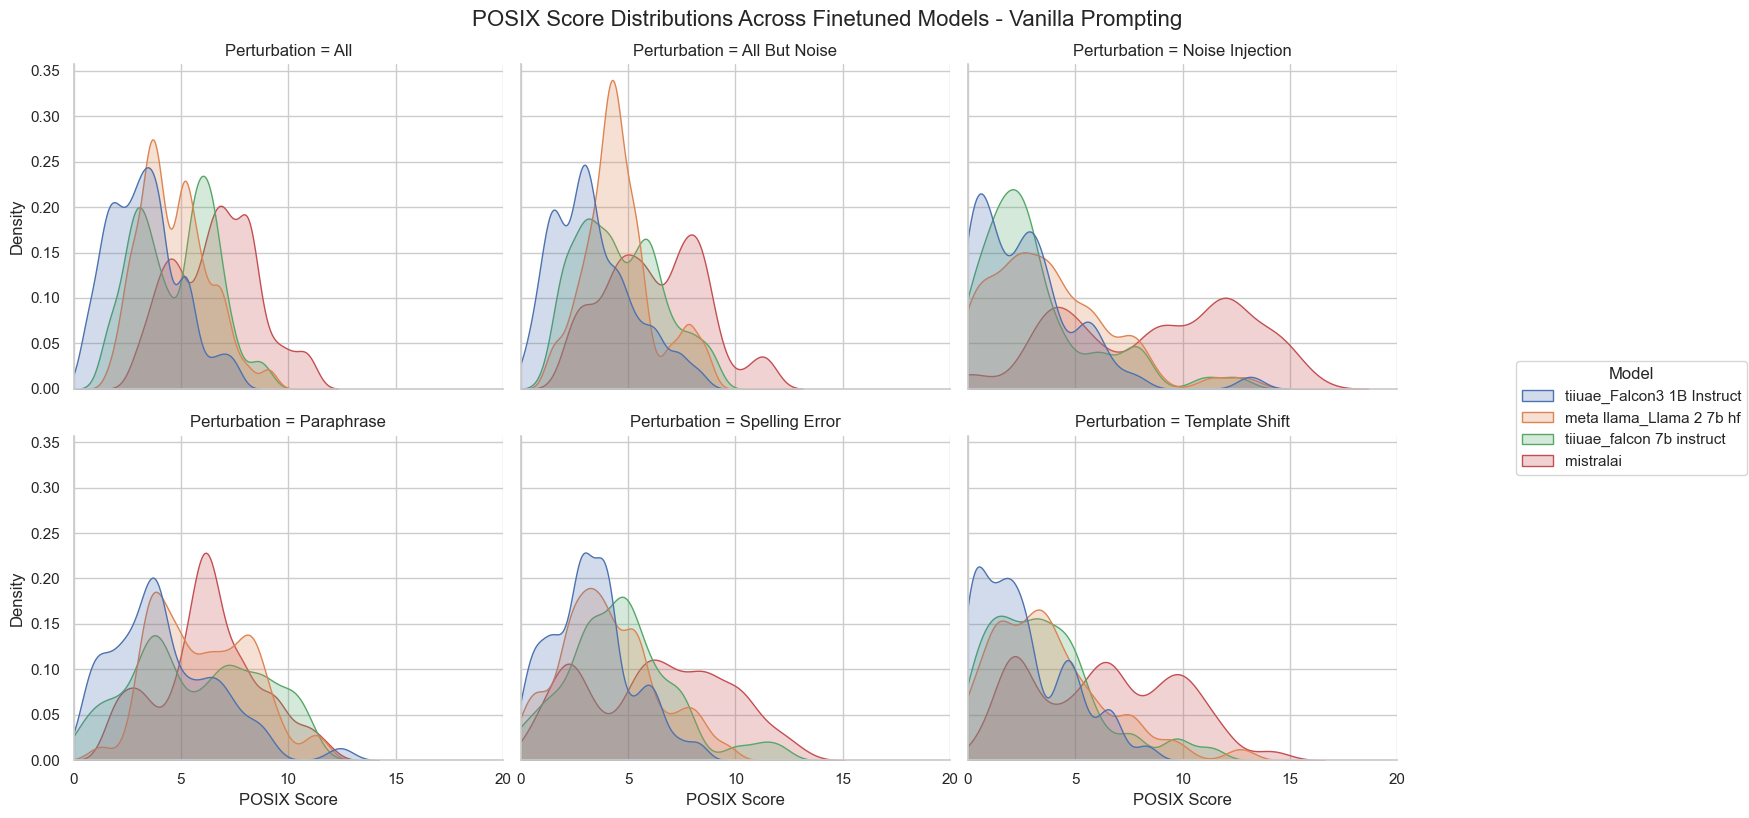

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re

sns.set(style="whitegrid")

# Folder with your CSVs
folder_path = "."  # <-- Replace this
csv_files = glob.glob(os.path.join(folder_path, "posix_*_ft_*_merged.csv"))

all_data = []

for file_path in csv_files:
    filename = os.path.basename(file_path)
    match = re.match(r"posix_(\w+)_ft_([\w\-]+)_", filename)
    technique = match.group(1) if match else "unknown"
    model = match.group(2).replace("-", " ") if match else "unknown"
    
    df = pd.read_csv(file_path)
    posix_cols = [col for col in df.columns if col.startswith("posix_")]
    
    for col in posix_cols:
        perturbation = col.replace("posix_", "")
        temp = pd.DataFrame({
            "POSIX": df[col],
            "Perturbation": perturbation.replace("_", " ").title(),
            "Model": model
        })
        all_data.append(temp)

# Combine all data
plot_df = pd.concat(all_data, ignore_index=True)

# Create the displot
g = sns.displot(
    data=plot_df,
    x="POSIX",
    col="Perturbation",
    hue="Model",
    kind="kde",
    fill=True,
    common_norm=False,
    col_wrap=3,
    height=4,
    aspect=1.2
)

# Adjust axes and formatting
for ax in g.axes.flat:
    ax.set_xlim(0, 20)
    ax.set_xticks([0, 5, 10, 15, 20])
    ax.set_xlabel("POSIX Score")
    ax.set_ylabel("Density")

# Move legend outside
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_frame_on(True)
g._legend.set_title("Model")

# Set main title and layout
g.fig.suptitle("POSIX Score Distributions Across Finetuned Models - Vanilla Prompting", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 0.001, 0.7])  # leave room on the right for legend
plt.show()


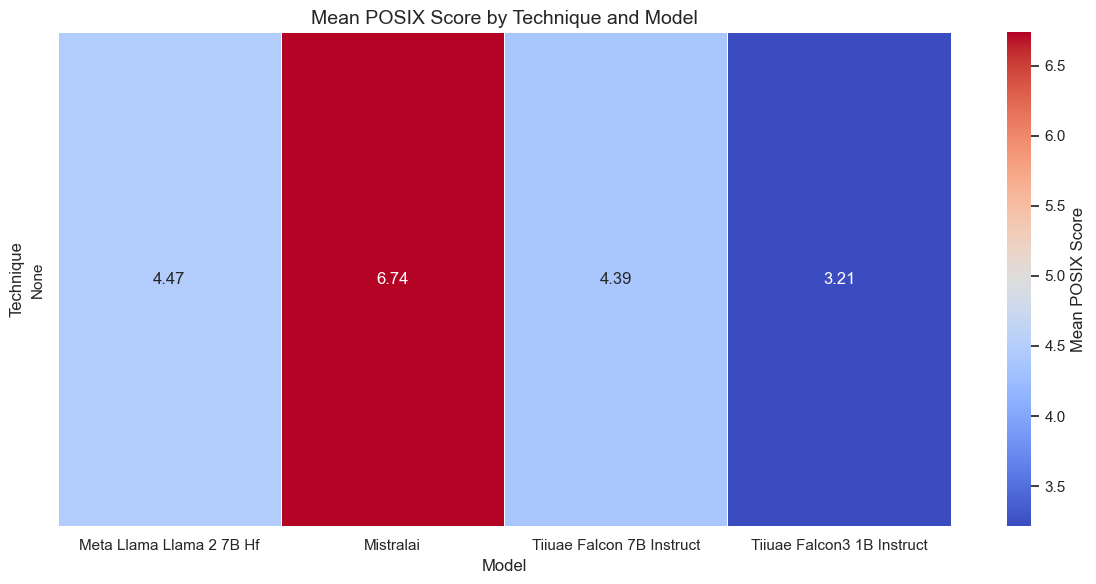

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re

# Set style
sns.set(style="whitegrid")

# Path to folder with CSVs
folder_path = "."
csv_files = glob.glob(os.path.join(folder_path, "posix_*_ft_*_merged.csv"))

# Aggregate data for heatmap
heatmap_data = []

for file_path in csv_files:
    filename = os.path.basename(file_path)
    match = re.match(r"posix_(\w+)_ft_([\w\-]+)_", filename)
    technique_raw = match.group(1) if match else "unknown"
    model_raw = match.group(2) if match else "unknown"

    # Clean names
    technique = technique_raw.replace("_", " ").title()
    model = model_raw.replace("-", " ").replace("_", " ").title()

    df = pd.read_csv(file_path)
    posix_columns = [col for col in df.columns if col.startswith("posix_")]

    # Mean POSIX over all columns for this model-technique pair
    mean_posix = df[posix_columns].mean().mean()
    heatmap_data.append({"Technique": technique, "Model": model, "Mean_POSIX": mean_posix})

# Convert to DataFrame
heatmap_df = pd.DataFrame(heatmap_data)

# Pivot and clip values
heatmap_pivot = heatmap_df.pivot(index="Technique", columns="Model", values="Mean_POSIX")
heatmap_pivot = heatmap_pivot.clip(lower=0, upper=20)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"label": "Mean POSIX Score"})
plt.title("Mean POSIX Score by Technique and Model", fontsize=14)
plt.ylabel("Technique")
plt.xlabel("Model")
plt.xticks()
plt.tight_layout()
plt.show()
